## Часть 1: Python
    
### 1.Задание:

- Загрузить данные из файла в DataFrame.
- Посчитать общую сумму продаж.
- Найти товар с максимальной и минимальной суммой продаж.
- Рассчитать среднюю сумму продаж.
- Создать столбец с датой продажи в формате год-месяц-день.
- Сохранить результаты в новый файл CSV.

Подключаем нужные библиотеки

In [1]:
import numpy as np
import pandas as pd

- Загрузить данные из файла в DataFrame.

Некоторые параметры, стоящие по умолчанию, не подошли:

Разделитель в данном файле это ';', а кодировка - 'windows-1251'

In [2]:
df = pd.read_csv('Данные о продаже товаров.csv', encoding='windows-1251', delimiter=';')

- Посчитать общую сумму продаж.

Вывожу, какие столбцы есть, чтобы иметь представление о содержимом таблицы

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 58 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Категория                                65 non-null     object 
 1   Подкатегория 2                           65 non-null     object 
 2   Подкатегория 3                           65 non-null     object 
 3   Артикул                                  65 non-null     int64  
 4   Артикул модификации                      0 non-null      float64
 5   Имя товара                               65 non-null     object 
 6   Категория (полный путь)                  65 non-null     object 
 7   Цена                                     65 non-null     object 
 8   Дата продажи                             65 non-null     object 
 9   Цена старая                              0 non-null      float64
 10  Цена закупки                             0 non-null 

Считаем общую сумму продаж по столбцу Количество

In [5]:
df['Количество'].sum()

547

Количество продаж = 547

- Найти товар с максимальной и минимальной суммой продаж.

Разобъем товары по Имени товара и посчитаем максимальное и минимальное число продаж

Максимальная сумма продаж = 15

In [6]:
df[['Имя товара', 'Количество']].max()

Имя товара    Модем ZTE MF93D
Количество                 15
dtype: object

Минимальная сумма продаж = 2

In [7]:
df[['Имя товара', 'Количество']].min()

Имя товара    Звуковая карта Asus Xonar AE
Количество                               2
dtype: object

- Рассчитать среднюю сумму продаж.

In [8]:
df['Количество'].mean()

8.415384615384616

- Создать столбец с датой продажи в формате год-месяц-день.


In [9]:
new_format_data = pd.to_datetime(df['Дата продажи'], dayfirst=True)

In [10]:
new_format_data

0    2019-12-29
1    2019-10-01
2    2020-06-22
3    2022-07-04
4    2018-01-13
        ...    
60   2021-04-14
61   2019-11-27
62   2020-08-13
63   2020-09-30
64   2019-10-14
Name: Дата продажи, Length: 65, dtype: datetime64[ns]

In [11]:
df.insert(loc=9, column='Дата продажи гмд', value=new_format_data)

Проверяем, что вставка столбца прошла успешно

In [12]:
df['Дата продажи гмд']

0    2019-12-29
1    2019-10-01
2    2020-06-22
3    2022-07-04
4    2018-01-13
        ...    
60   2021-04-14
61   2019-11-27
62   2020-08-13
63   2020-09-30
64   2019-10-14
Name: Дата продажи гмд, Length: 65, dtype: datetime64[ns]

- Сохранить результаты в новый файл CSV.

In [13]:
df.to_csv('./Данные о продаже товаров2.csv', index= False )

### 2.Задание:

- Загрузить данные из файла в DataFrame.
- Построить график, отображающий количество продаж по месяцам.
- Рассчитать общее количество продаж для каждого месяца.
- Найти месяц с наибольшим и наименьшим количеством продаж.
- Сохранить график в файл формата PNG.

- Загрузить данные из файла в DataFrame.

Загружаем данные из нового файла о продаже товаров

In [14]:
df2 = pd.read_csv('Данные о продаже товаров2.csv')
df2.head()

,Категория,Подкатегория 2,Подкатегория 3,Артикул,Артикул модификации,Имя товара,Категория (полный путь),Цена,Дата продажи,Дата продажи гмд,...,Подключение и разъемы,Питание,Габариты,Вес.1,Скорость подключения Wi-Fi,Радиус действия,Кол-во подключаемых устройств,Ёмкость аккумулятора,Время работы в режиме интернет-серфинга,Время работы в режиме ожидания
0,Компьютерная техника,Комплектующие,Звуковые карты,356165,NaN,Звуковая карта Creative Sound Blaster Z,Компьютерная техника->Комплектующие->Звуковые ...,5907,29.12.2019,2019-12-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Компьютерная техника,Комплектующие,Звуковые карты,345995,NaN,Звуковая карта Asus Xonar DG,Компьютерная техника->Комплектующие->Звуковые ...,2200,01.10.2019,2019-10-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Компьютерная техника,Комплектующие,Звуковые карты,346030,NaN,Звуковая карта Asus Xonar DGX,Компьютерная техника->Комплектующие->Звуковые ...,"2605,9",22.06.2020,2020-06-22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Компьютерная техника,Комплектующие,Звуковые карты,346235,NaN,Звуковая карта Creative Sound Blaster X-Fi Sur...,Компьютерная техника->Комплектующие->Звуковые ...,"4216,3",04.07.2022,2022-07-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Компьютерная техника,Комплектующие,Звуковые карты,347574,NaN,Звуковая карта Creative Sound Blaster Audigy Rx,Компьютерная техника->Комплектующие->Звуковые ...,4631,13.01.2018,2018-01-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Подгружаем библиотеку для визуализации данных
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне

- Построить график, отображающий количество продаж по месяцам.

In [16]:
month_sales =  df['Дата продажи гмд'].dt.month

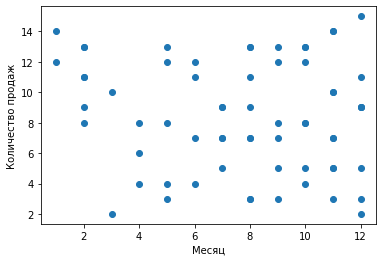

In [17]:
plt.scatter(month_sales, df['Количество'])
plt.xlabel("Месяц")
plt.ylabel("Количество продаж")
pass

Видим, что в каждый месяц производились покупки по разным товарам

- Рассчитать общее количество продаж для каждого месяца.

Посчитаем сумму продаж для каждого месяца

In [18]:
sum_month_sales = df['Количество'].groupby(df['Дата продажи гмд'].dt.month).sum()
sum_month_sales

Дата продажи гмд
1     26
2     65
3     12
4     18
5     40
6     34
7     37
8     66
9     48
10    63
11    75
12    63
Name: Количество, dtype: int64

- Построить график, отображающий количество продаж по месяцам.

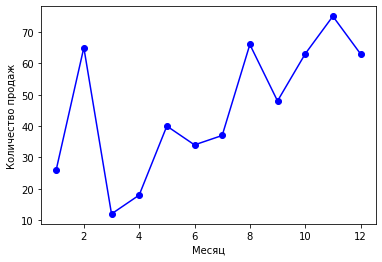

In [20]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], sum_month_sales, 'b-o')
plt.xlabel("Месяц")
plt.ylabel("Количество продаж")
plt.savefig('Продажи по месяцам.png', facecolor = 'white', dpi = 150)

- Найти месяц с наибольшим и наименьшим количеством продаж.

Месяц с наибольшим числом продаж

In [21]:
months = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
months[sum_month_sales.idxmax()-1], sum_month_sales.max()

('Ноябрь', 75)

Месяц с наименьшим числом продаж

In [22]:
months[sum_month_sales.idxmin()-1], sum_month_sales.min()

('Март', 12)

### 3.Задание:

Тема: Работа со списками

Ваша задача:

- Создайте список из 10 единиц и запишите его в переменную lst
- Добавьте к списку lst элемент с типом str 'Строка' в конце списка
- Замените элемент списка с индексом 4 на число 189
- Добавьте вложенный список  ['a', 'b', 'a', 'hello'] в конец получившегося списка
- Вставьте кортеж со значениями 1, 6, 89 на место с индексом -3 (3-й элемент с конца списка)
- Выведите значение элемента с индексом 0
- Получите значение элемента с индексом -1 (последний элемент списка)
- Удалите элемент со значением 189
- Посчитайте количество элементов в списке со значением 1

In [23]:
# Создайте список из 10 единиц и запишите его в переменную lst
lst = [1]*10

In [24]:
# Добавьте к списку lst элемент с типом str 'Строка' в конце списка
lst.append('Строка')

In [25]:
# Замените элемент списка с индексом 4 на число 189
lst[4] = 189

In [26]:
# Добавьте вложенный список ['a', 'b', 'a', 'hello'] в конец получившегося списка
lst.append(['a', 'b', 'a', 'hello'])

In [27]:
# Вставьте кортеж со значениями 1, 6, 89 на место с индексом -3
lst[-3] = (1, 6, 89)

In [28]:
lst

[1, 1, 1, 1, 189, 1, 1, 1, 1, (1, 6, 89), 'Строка', ['a', 'b', 'a', 'hello']]

In [29]:
# Выведите значение элемента с индексом 0 
print(lst[0])

1


In [30]:
# Получите значение элемента с индексом -1 (последний элемент списка)
a = lst[-1]

In [31]:
# Удалите элемент со значением 189
lst.remove(189)

In [32]:
# Посчитайте количество элементов в списке со значением 1
number_of_1 = lst.count(1)
number_of_1

8

### 4.Задание:
    
Тема: Работа со списками
    
Ваша задача: Написать функцию chunks с двумя параметрами a и n.

где:

a=[1,2,3,'4',5,6,7,'8',9] - список

n=4 - количество вложенных списков

При вызове функции необходимо получить следующий список [[1, 2, 3], ['4', 5], [6, 7], ['8', 9]]. 
При этом, значения 4 и 8 - имеют тип данных str.

#### Сделала функцию, которая разбивает список на n равных частей, а остаток элементов отправляет в первый список

In [33]:
def chunks(a, n):
    lst = []
    size_part = len(a)//n 
    remainder = len(a)%n
    
    lst.append(a[0:size_part+remainder])
    num_part = 1
    
    while(num_part != n):
        part = a[num_part*size_part+remainder : (num_part+1)*size_part+remainder]
        lst.append(part)
        num_part += 1
    return lst


In [34]:
a = [1, 2, 3, '4', 5, 6, 7, '8', 9]
n = 4
print(chunks(a, n))

[[1, 2, 3], ['4', 5], [6, 7], ['8', 9]]


## Часть 2: SQL

### 1.Задание:

Тема: Запросы на выборку данных 

Текст задания: Вам предоставляется схема базы данных с таблицами "DEPARTMENT" и "EMPLOYEE":

**DEPARTMENT**

ID | NUMBER | < pk > |
:-: | :-: | :-: |
NAME | VARCHAR2(100) |  |

**EMPLOYEE**

ID | NUMBER | < pk > | 
:-: | :-: | :-: |
DEPARTMENT_ID | NUMBER | < fk1 > |
CHIEF_ID | NUMBER | < fk2 > |
NAME | VARCHAR2(100) |  |
SALARY | NUMBER |   |

Ваша задача:

- Напишите SQL-запрос, который выводит список сотрудников, получающих заработную плату большую чем у непосредственного руководителя
- Напишите SQL-запрос, который выводит список сотрудников, получающих максимальную заработную плату в своем отделе
- Напишите SQL-запрос, который выводит список ID отделов, количество сотрудников в которых не превышает 3 человек

#### 1) Напишите SQL-запрос, который выводит список сотрудников, получающих заработную плату большую чем у непосредственного руководителя

SELECT * 

FROM employee AS employees, employee AS chieves

WHERE chieves.id = employees.chief_id AND employees.salary > chieves.salary;

#### 2) Напишите SQL-запрос, который выводит список сотрудников, получающих максимальную заработную плату в своем отделе

SELECT *

FROM employee

WHERE employee.salary = 

                (SELECT MAX(salary) 
                
                 FROM employee AS max_salary 
                 
                 WHERE max_salary.department_id = employee.department_id);

#### 3) Напишите SQL-запрос, который выводит список ID отделов, количество сотрудников в которых не превышает 3 человек

SELECT department_id

FROM employee

GROUP BY department_id

HAVING COUNT(NAME) <= 3;


### 2.Задание:

Тема: Объединение таблиц

Текст задания: У вас есть следующая таблица table1:

index | column1 | column2 | 
:-: | :-: | :-: |
0 | 1 | 1 |
1 | 1 | 1 |
2 | 1 | 1 |

Что выведет следующий запрос:

```
select *
from table1 t1
left join table1 t2 on t1.column1 = t2.column2
```

#### Запрос выведет таблицу состоящую из соединения двух таблиц t1 и t2, где каждая запись таблицы t1 соединена с каждой записью таблицы t2. В общем у нас будет 3*3 = 9 строк, 6 столбцов. 
Индексы в строках от первой и второй таблицы 0 и 0, 0 и 1, 0 и 2, 1 и 0, 1 и 1, 1 и 2, 2 и 0, 2 и 1, 2 и 2